In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('adult.data')

In [7]:
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
# Removing all Columns without a continuous Attributes 
df.pop('workclass')
df.pop('education')
df.pop('maritalstatus')
df.pop('occupation')
df.pop('relationship')
df.pop('race')
df.pop('sex')
df.pop('nativecountry')
pass

In [9]:
df

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek,salary
0,39,77516,13,2174,0,40,<=50K
1,50,83311,13,0,0,13,<=50K
2,38,215646,9,0,0,40,<=50K
3,53,234721,7,0,0,40,<=50K
4,28,338409,13,0,0,40,<=50K
...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,<=50K
32557,40,154374,9,0,0,40,>50K
32558,58,151910,9,0,0,40,<=50K
32559,22,201490,9,0,0,20,<=50K


In [10]:
#Standardizing Salary Column since it is in the format of strings
#If Salary == ' <50k' == -1
#Else Salary == ' >50k' == 1
np_salary = np.zeros((df.shape[0],1))
for i in range(df.shape[0]):
    np_salary[i][0] = -1 if df.iloc[i][6] == ' <=50K' else 1

In [11]:
#Normalizing Data in Mean and Unit Variance
def normalization(df):
    np_norm = np.zeros((df.shape[0],df.columns.size))
    for i in range(df.columns.size-1):
        mean_ = df.iloc[:,i].mean()
        std_ = df.iloc[:,i].std()
        for j in range(df.shape[0]):
            np_norm[j][i] = (df.iloc[j][i]-mean_)/std_
    return np_norm

In [12]:
# for i in range(df.columns.size-1):
#     mean_ = df.iloc[:,i].mean()
#     std_ = df.iloc[:,i].std()
#     def normalize(x):
#         return (x - mean_) / (std_)
#     df.iloc[:,i] = df.iloc[:,i].apply(normalize)
# df

In [13]:
np_norm = normalization(df)

In [14]:
np_norm

array([[ 0.03067009, -1.06359441,  1.13472134, ..., -0.2166562 ,
        -0.0354289 ,  0.        ],
       [ 0.83709613, -1.00869151,  1.13472134, ..., -0.2166562 ,
        -2.222119  ,  0.        ],
       [-0.04264137,  0.24507474, -0.42005317, ..., -0.2166562 ,
        -0.0354289 ,  0.        ],
       ...,
       [ 1.42358779, -0.3587719 , -0.42005317, ..., -0.2166562 ,
        -0.0354289 ,  0.        ],
       [-1.2156247 ,  0.11095818, -0.42005317, ..., -0.2166562 ,
        -1.65519934,  0.        ],
       [ 0.98371904,  0.9298783 , -0.42005317, ..., -0.2166562 ,
        -0.0354289 ,  0.        ]])

In [15]:
df_norm = pd.DataFrame(np_norm)
df_norm.header = False

In [19]:
df_norm[6] = np_salary

In [374]:
df_norm

,0,1,2,3,4,5,6
0,0.030670,-1.063594,1.134721,0.148451,-0.216656,-0.035429,-1.0
1,0.837096,-1.008692,1.134721,-0.145918,-0.216656,-2.222119,-1.0
2,-0.042641,0.245075,-0.420053,-0.145918,-0.216656,-0.035429,-1.0
3,1.057031,0.425795,-1.197440,-0.145918,-0.216656,-0.035429,-1.0
4,-0.775756,1.408154,1.134721,-0.145918,-0.216656,-0.035429,-1.0
...,...,...,...,...,...,...,...
32556,-0.849067,0.639731,0.746028,-0.145918,-0.216656,-0.197406,-1.0
32557,0.103982,-0.335428,-0.420053,-0.145918,-0.216656,-0.035429,1.0
32558,1.423588,-0.358772,-0.420053,-0.145918,-0.216656,-0.035429,-1.0
32559,-1.215625,0.110958,-0.420053,-0.145918,-0.216656,-1.655199,-1.0


In [328]:
class SVM(object):
    def __init__(self,visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    def fit(self,data):
        #train with data
        self.data = data
        # { |\w\|:{w,b}}
        opt_dict = {}
        
        transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
        
        all_data = np.array([])
        for yi in self.data:
            all_data = np.append(all_data,self.data[yi])
                    
        self.max_feature_value = max(all_data)         
        self.min_feature_value = min(all_data)
        all_data = None
        
        #with smaller steps our margins and db will be more precise
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      #point of expense
                      self.max_feature_value * 0.001,]
        
        #extremly expensise
        b_range_multiple = 5
        #we dont need to take as small step as w
        b_multiple = 5
        
        latest_optimum = self.max_feature_value*10
        
        """
        objective is to satisfy yi(x.w)+b>=1 for all training dataset such that ||w|| is minimum
        for this we will start with random w, and try to satisfy it with making b bigger and bigger
        """
        #making step smaller and smaller to get precise value
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            
            #we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*self.max_feature_value*b_range_multiple,
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        
                        #weakest link in SVM fundamentally
                        #SMO attempts to fix this a bit
                        # ti(xi.w+b) >=1
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not (yi*(np.dot(w_t,xi)+b)).any() >=1:
                                    found_option=False
                        if found_option:
                            """
                            all points in dataset satisfy y(w.x)+b>=1 for this cuurent w_t, b
                            then put w,b in dict with ||w|| as key
                            """
                            opt_dict[np.linalg.norm(w_t)]=[w_t,b]
                
                #after w[0] or w[1]<0 then values of w starts repeating itself because of transformation
                #Think about it, it is easy
                #print(w,len(opt_dict)) Try printing to understand
                if w[0]<0:
                    optimized=True
                    print("optimized a step")
                else:
                    w = w-step
                    
            # sorting ||w|| to put the smallest ||w|| at poition 0 
            norms = sorted([n for n in opt_dict])
            #optimal values of w,b
            opt_choice = opt_dict[norms[0]]

            self.w=opt_choice[0]
            self.b=opt_choice[1]
            
            #start with new latest_optimum (initial values for w)
            latest_optimum = opt_choice[0][0]+step*2
    
    def predict(self,features):
        #sign(x.w+b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification!=0 and self.visualization:
            self.ax.scatter(features[0],features[1],s=200,marker='*',c=self.colors[classification])
        return (classification,np.dot(np.array(features),self.w)+self.b)
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,c=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        # hyperplane = x.w+b (actually its a line)
        # v = x0.w0+x1.w1+b -> x1 = (v-w[0].x[0]-b)/w1
        #psv = 1     psv line ->  x.w+b = 1a small value of b we will increase it later
        #nsv = -1    nsv line ->  x.w+b = -1
        # dec = 0    db line  ->  x.w+b = 0
        def hyperplane(x,w,b,v):
            #returns a x2 value on line when given x1
            return (-w[0]*x-b+v)/w[1]
       
        hyp_x_min= self.min_feature_value*0.9
        hyp_x_max = self.max_feature_value*1.1
        
        # (w.x+b)=1
        # positive support vector hyperplane
        pav1 = hyperplane(hyp_x_min,self.w,self.b,1)
        pav2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[pav1,pav2],'k')
        
        # (w.x+b)=-1
        # negative support vector hyperplane
        nav1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nav2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nav1,nav2],'k')
        
        # (w.x+b)=0
        # db support vector hyperplane
        db1 = hyperplane(hyp_x_min,self.w,self.b,0)
        db2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'y--')
    def print_(self):
        print(self.w)
        print(self.b)

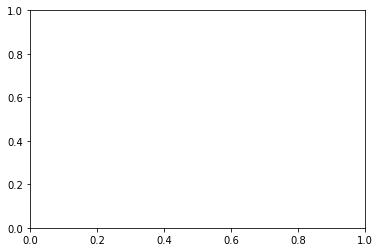

In [329]:
svm = SVM()

In [375]:
df_norm = df_norm.sort_values(by=6)
#df_norm.pop(6)

In [379]:
df_sal = df_norm[6]

In [380]:
np_sort = df_norm.to_numpy()

In [332]:
np_zeros = np.zeros((24720,6))
np_zeros = np_sort[:24720]
np_zeros

array([[ 0.03067009, -1.06359441,  1.13472134,  0.14845062, -0.2166562 ,
        -0.0354289 ],
       [-0.11595283,  0.48373893, -0.42005317, -0.14591824, -0.2166562 ,
        -0.84531412],
       [ 1.79014508,  0.94706447,  1.52341497,  5.44763168, -0.2166562 ,
         0.77445632],
       ...,
       [ 2.23001383, -0.82334803, -0.42005317, -0.14591824, -0.2166562 ,
        -1.33124526],
       [-1.14231324, -1.26848313,  1.13472134, -0.14591824, -0.2166562 ,
        -0.0354289 ],
       [ 1.86345654,  0.7189261 , -0.42005317, -0.14591824, -0.2166562 ,
        -0.0354289 ]])

In [333]:
np_ones = np.zeros((7841,6))
np_ones = np_sort[24720:32561]
np_ones

array([[-0.55582158,  3.64023415,  1.13472134, -0.14591824, -0.2166562 ,
         0.28852519],
       [ 0.177293  ,  0.34214724, -0.03135955, -0.14591824, -0.2166562 ,
         0.61247927],
       [-0.3358872 , -0.10362263,  1.13472134, -0.14591824, -0.2166562 ,
        -0.0354289 ],
       ...,
       [ 0.47053884,  0.23012448,  2.30080222, -0.14591824, -0.2166562 ,
         0.77445632],
       [ 1.27696487, -0.10824603, -0.03135955, -0.14591824, -0.2166562 ,
        -0.0354289 ],
       [ 0.98371904,  0.9298783 , -0.42005317,  1.88839534, -0.2166562 ,
        -0.0354289 ]])

In [334]:
np_sort.shape

(32561, 6)

In [336]:
np_ones.shape

(7841, 6)

In [337]:
np_zeros.shape

(24720, 6)

In [342]:
dp_ones = pd.DataFrame(np_ones)
dp_zeros = pd.DataFrame(np_zeros)

In [346]:
dp_ones

,0,1,2,3,4,5
0,-0.555822,3.640234,1.134721,-0.145918,-0.216656,0.288525
1,0.177293,0.342147,-0.031360,-0.145918,-0.216656,0.612479
2,-0.335887,-0.103623,1.134721,-0.145918,-0.216656,-0.035429
3,-0.042641,0.441617,1.134721,0.895070,-0.216656,-0.035429
4,0.910408,-0.128265,0.746028,-0.145918,-0.216656,-0.035429
...,...,...,...,...,...,...
7836,0.910408,4.585369,0.357334,-0.145918,-0.216656,0.774456
7837,0.397227,-0.693002,1.523415,-0.145918,-0.216656,0.774456
7838,0.470539,0.230124,2.300802,-0.145918,-0.216656,0.774456
7839,1.276965,-0.108246,-0.031360,-0.145918,-0.216656,-0.035429


In [347]:
np_ones

array([[-0.55582158,  3.64023415,  1.13472134, -0.14591824, -0.2166562 ,
         0.28852519],
       [ 0.177293  ,  0.34214724, -0.03135955, -0.14591824, -0.2166562 ,
         0.61247927],
       [-0.3358872 , -0.10362263,  1.13472134, -0.14591824, -0.2166562 ,
        -0.0354289 ],
       ...,
       [ 0.47053884,  0.23012448,  2.30080222, -0.14591824, -0.2166562 ,
         0.77445632],
       [ 1.27696487, -0.10824603, -0.03135955, -0.14591824, -0.2166562 ,
        -0.0354289 ],
       [ 0.98371904,  0.9298783 , -0.42005317,  1.88839534, -0.2166562 ,
        -0.0354289 ]])

In [343]:
dict_ = {-1: dp_ones, 1: dp_zeros}

In [344]:
svm.fit(dict_)

optimized a step
optimized a step
optimized a step


In [348]:
svm.print_()

[ 1.18512838e-13 -1.18512838e-13]
66.90488925141851


In [43]:
class SGD_:
    def __init__(self, reg_strength=1e-3, learning_rate=0.1):
        self.reg_strength=reg_strength
        self.learning_rate=learning_rate

    def computeCost(self, W, X, Y):
        # calculate hinge loss
        M = X.shape[0]
        Y = np.array(Y)
        distances = 1 - Y.reshape(1, -1) * (np.dot(X, W))
        distances[distances < 0] = 0 
        hinge_loss = self.reg_strength * (np.sum(distances) / M)

        cost = 1 / 2 * np.dot(np.transpose(W), W) + hinge_loss
        return cost
    
    def calcCostGradient(self, W, X_batch, Y_batch):

        Y_final= Y_batch.astype(np.float64)
        X_final = X_batch
        W_64 = W.astype(np.float64)
        distance = 1 - (Y_final * np.dot(X_final, W_64))
        dw = np.zeros(len(W_64))
        dw = dw.reshape(-1, 1)
        if all(item < 0 for item in distance):
            di = W_64
        else:
            x_test = W_64 - ((self.reg_strength * Y_final) * X_final.reshape(-1, 1))
            di = x_test
        dw += di
        return dw

    def sgd(self, features, outputs, max_epochs):
        weights = np.zeros(features.shape[1])
        weights = weights.reshape(-1, 1)
        epochs = 0
        prev_cost = float("inf")
        cost_thresh = 0.01  

        for epoch in range(1, max_epochs):

            X, Y = shuffle(features, outputs)
            for i in range(len(X)):
                try:
                    ascent = calcCostGradient(weights, np.array(X.iloc[[i]]), Y[i])
                    weights = weights - (self.learning_rate * ascent)
                except:
                    continue

            if epoch == max_epochs - 1:
                cost = self.computeCost(weights, features, outputs)
                print(f"Epoch is:{epoch} and Cost is: {cost}")

                if abs(prev_cost - cost) < cost_thresh * prev_cost:
                    return weights
                prev_cost = cost
                epochs += 1
        return weights

    def test(self, features, labels):
        y_test_predicted = np.array([])
        for i in range(X_test.shape[0]):
            yp = np.sign(np.dot(W, X_test.to_numpy()[i])) #model
            y_test_predicted = y_test_predicted.append(yp)
            return y_test_predicted
        
    def test2(X_test, weights):
        y_test_predicted = np.ndarray(shape=(len(X_test), 1))
        for i in range(X_test.shape[0]):
            yp = np.sign(np.dot(np.transpose(weights), X_test.to_numpy()[i])) #model
            y_test_predicted = np.append(y_test_predicted, yp[0])
            # y_test_predicted = y_test_predicted.append(int(yp[0]))
        return y_test_predicted

In [40]:
model = SGD_()

In [20]:
y = df_norm[6]

In [31]:
df_norm.pop(6)

0       -1.0
1       -1.0
2       -1.0
3       -1.0
4       -1.0
        ... 
32556   -1.0
32557    1.0
32558   -1.0
32559   -1.0
32560    1.0
Name: 6, Length: 32561, dtype: float64

In [32]:
X = df_norm

In [33]:
X

,0,1,2,3,4,5
0,0.030670,-1.063594,1.134721,0.148451,-0.216656,-0.035429
1,0.837096,-1.008692,1.134721,-0.145918,-0.216656,-2.222119
2,-0.042641,0.245075,-0.420053,-0.145918,-0.216656,-0.035429
3,1.057031,0.425795,-1.197440,-0.145918,-0.216656,-0.035429
4,-0.775756,1.408154,1.134721,-0.145918,-0.216656,-0.035429
...,...,...,...,...,...,...
32556,-0.849067,0.639731,0.746028,-0.145918,-0.216656,-0.197406
32557,0.103982,-0.335428,-0.420053,-0.145918,-0.216656,-0.035429
32558,1.423588,-0.358772,-0.420053,-0.145918,-0.216656,-0.035429
32559,-1.215625,0.110958,-0.420053,-0.145918,-0.216656,-1.655199


In [41]:
model.sgd(X, y, 300)

Epoch is:299 and Cost is: [[32.561]]


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])